In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('iris_onlyTesting.csv')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.4,3.9,1.3,0.4
1,4.8,3.1,1.6,0.2
2,6.1,2.9,4.7,1.4
3,6.3,2.5,4.9,1.5
4,6.2,2.8,4.8,1.8


In [4]:
df.shape

(5, 4)

In [5]:
X = df.values
y = ["Iris-setosa", "Iris-setosa", "Iris-versicolor", "Iris-versicolor", "Iris-versicolor"]
print(X)
print(y)

[[5.4 3.9 1.3 0.4]
 [4.8 3.1 1.6 0.2]
 [6.1 2.9 4.7 1.4]
 [6.3 2.5 4.9 1.5]
 [6.2 2.8 4.8 1.8]]
['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor']


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15, random_state=42)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,5)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):

    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    train_accuracy[i] = knn.score(X_train, y_train)

    test_accuracy[i] = knn.score(X_test, y_test) 

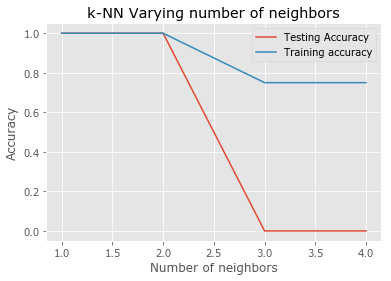

In [9]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [10]:
knn = KNeighborsClassifier(n_neighbors=2)

In [11]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [12]:
knn.score(X_test,y_test)

1.0

**Confusion Matrix**

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Scikit-learn provides facility to calculate confusion matrix using the confusion_matrix method.

In [13]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [14]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [15]:
confusion_matrix(y_test,y_pred)

array([[1]])

Considering confusion matrix above:

True negative = 165

False positive = 36

True postive = 60

False negative = 47

Confusion matrix can also be obtained using crosstab method of pandas.

In [16]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,All
True,,
Iris-setosa,1,1
All,1,1
